# 예지보수

- Predictive Maintenance (PM)
 - 장비, 부품, 제품의 장애를 예측하는 것
- 보수의 종류
  > 고장 후 보수: 기기가 고장나면 보수를 하는 것   
  > 정기적인 보수: 일정한 시간 간격으로 보수를 하는 것    
  > 예지 보수: 고장을 예측하여 적절한 시점에 보수를 하는 것    

## 머신러닝을 이용한 PM 예제

- 항공기 엔진 운영 데이터 (센서 및 설정 데이터)를 보고 고장시점을 예측하는 예제
- 머신러닝의 회귀 및 분류 예측 모델을 사용한다
- 신경망의 LSTM 모델을 사용한다
- 참고 [MS Azure](https://gallery.azure.ai/Experiment/Predictive-Maintenance-Step-1-of-3-data-preparation-and-feature-engineering-2)


## PM 회귀 모델
- TTF(time to fail): 고장까지 남은 시간을 예측하는 회귀 모델로 구현
<img src="https://github.com/data-labs/image/blob/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-02-15%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%2010.02.12.png?raw=1" align='center'>

## PM 분류 모델 (이진 분류)
- U (Unsafe): TTF가 주어진 경계치 이하로 낮은 위험한 상태
- U 값이 0/1을 갖는 이진 분류 모델로 구현
<img src="https://github.com/data-labs/image/blob/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-02-15%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%2010.03.35.png?raw=1" align='left'>

# 데이터 준비

- 항공기 엔진 운영 센서 및 설정 데이터와 고장시점 정보 데이터 (마이크로소프트사의 Azure에서 제공)
- 공개 데이터 주소: [https://azuremlsamples.azureml.net/templatedata/PM_train.txt](https://azuremlsamples.azureml.net/templatedata/PM_train.txt)
- 모델을 만드는데 사용할 훈련 데이터에는 엔진별 가동 데이터를 고장 시점까지 주어진다
- 테스트 데이터에는 엔진 가동 정보만 있고 정답은 (향후 잔여수명)은 별도의 truth 데이터로 제공한다

## 훈련 데이터

- 파이썬의 판다스(pandas) 라이브러리가 제공하는 read_csv() 함수로 데이터를 읽는다
- 데이터프레임(DataFrame) 형태로 읽는다
 - 데이터프레임은 2차원, 테이블 구조의 데이터를 다루며 액셀과 같이 편리한 기능을 수행할 수 있다
 - 행과 열로 구성되며, 행은 샘플을 구분하고 열은 특성(features)을 구분한다


In [1]:
# 훈련 데이터 URL 주소
data_address = "https://azuremlsamples.azureml.net/templatedata/PM_train.txt"

In [3]:
# 파이썬의 판다스 라이브러리가 제공하는 read_csv() 함수로 데이터를 읽는다

import pandas as pd
df = pd.read_csv(data_address, sep=" ", header=None)

In [4]:
# 데이터 프레임 슬라이싱 (일부 보기)

df[:3]

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN


In [5]:
# 데이터 프레임의 정보 보기
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 28 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       20631 non-null  int64  
 1   1       20631 non-null  int64  
 2   2       20631 non-null  float64
 3   3       20631 non-null  float64
 4   4       20631 non-null  float64
 5   5       20631 non-null  float64
 6   6       20631 non-null  float64
 7   7       20631 non-null  float64
 8   8       20631 non-null  float64
 9   9       20631 non-null  float64
 10  10      20631 non-null  float64
 11  11      20631 non-null  float64
 12  12      20631 non-null  float64
 13  13      20631 non-null  float64
 14  14      20631 non-null  float64
 15  15      20631 non-null  float64
 16  16      20631 non-null  float64
 17  17      20631 non-null  float64
 18  18      20631 non-null  float64
 19  19      20631 non-null  float64
 20  20      20631 non-null  float64
 21  21      20631 non-null  int64  
 22

In [6]:
# 빈 컬럼 삭제
# [ ]는 리스트를 정의하는데, 그리고 인덱싱에 사용한다
# axis=1은 행이 아니라 컬럼 삭제를 의미
# inplace=True는 수행내용을 데이터프레임 df에 즉시 반영하라는 뜻

df.drop(df.columns[[26, 27]], axis=1, inplace=True)
df[:3]

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442


In [7]:
# 컬럼 이름 지정

column_names = ['id', 'cycle', 'setting1', 'setting2', 'setting3', 's1', 's2', 's3',
                     's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14',
                     's15', 's16', 's17', 's18', 's19', 's20', 's21']
df.columns = column_names
df[:3]

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442


## 고장 시점 레이블 추가
- 총 100개의 엔진에 대해서 각 엔진별로 고장나기 전까지의 데이터가 주어져 있다 [고장시점 정보 보기](https://az712634.vo.msecnd.net/samplesimg/v1/T4/labeling_1.png)

### 레이블(y)  추가
- 회귀 분석에서는 잔여시간(TTF: time to fail, 또는 RUL: remaining useful lifetime)을 예측하며 각 상태(State) 값을 보고 앞으로 남은 잔여시간을 예측하는 회귀 모델을 만든다
- 분류 분석에서는 앞으로 특정 기간 이내에 고장 날지 여부를 예측한다. 예를 들어 30 사이클 이내에 고장 여부를 분류한다 (0/1 구분)
- 회귀 및 분류를 위한 레이블을 각각 만들겠다

### RUL(Remaining Useful Life)
  - 같은 엔진 ID에 대해서 최대 cycle 값이 "수명"을 나타낸다
  - 이 수명값을 rul 데이터프레임에 저장한다
  - 같은 엔진들 즉 같은 'id'를 같는 샘플들을 별도의 데이터프레임으로 만드는 groupby를 사용한다

- 판다스의 그룹바이 사용
- 100개 엔진별 데이터프레임을 내부적으로 만든다

In [8]:
g = df.groupby('id')
g

In [9]:
# 그룹바이 객체에 포함된 내부 그룹의 갯수 (엔진의 id 값이 100 종류임)
g.ngroups

100

In [10]:
# id가 1인 그룹 보기

g.get_group(1)

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,1,188,-0.0067,0.0003,100.0,518.67,643.75,1602.38,1422.78,14.62,...,519.79,2388.23,8117.69,8.5207,0.03,396,2388,100.0,38.51,22.9588
188,1,189,-0.0006,0.0002,100.0,518.67,644.18,1596.17,1428.01,14.62,...,519.58,2388.33,8117.51,8.5183,0.03,395,2388,100.0,38.48,23.1127
189,1,190,-0.0027,0.0001,100.0,518.67,643.64,1599.22,1425.95,14.62,...,520.04,2388.35,8112.58,8.5223,0.03,398,2388,100.0,38.49,23.0675
190,1,191,-0.0000,-0.0004,100.0,518.67,643.34,1602.36,1425.77,14.62,...,519.57,2388.30,8114.61,8.5174,0.03,394,2388,100.0,38.45,23.1295


In [11]:
# "cycle" 컬럼 내용 보기
g.get_group(1)['cycle']

0        1
1        2
2        3
3        4
4        5
      ... 
187    188
188    189
189    190
190    191
191    192
Name: cycle, Length: 192, dtype: int64

In [12]:
g.get_group(1)['cycle'].max()

192

In [13]:
g.get_group(2)

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
192,2,1,-0.0018,0.0006,100.0,518.67,641.89,1583.84,1391.28,14.62,...,522.33,2388.06,8137.72,8.3905,0.03,391,2388,100.0,38.94,23.4585
193,2,2,0.0043,-0.0003,100.0,518.67,641.82,1587.05,1393.13,14.62,...,522.70,2387.98,8131.09,8.4167,0.03,392,2388,100.0,39.06,23.4085
194,2,3,0.0018,0.0003,100.0,518.67,641.55,1588.32,1398.96,14.62,...,522.58,2387.99,8140.58,8.3802,0.03,391,2388,100.0,39.11,23.4250
195,2,4,0.0035,-0.0004,100.0,518.67,641.68,1584.15,1396.08,14.62,...,522.49,2387.93,8140.44,8.4018,0.03,391,2388,100.0,39.13,23.5027
196,2,5,0.0005,0.0004,100.0,518.67,641.73,1579.03,1402.52,14.62,...,522.27,2387.94,8136.67,8.3867,0.03,390,2388,100.0,39.18,23.4234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,2,283,0.0046,0.0002,100.0,518.67,643.78,1602.03,1429.67,14.62,...,520.07,2388.20,8174.85,8.5199,0.03,398,2388,100.0,38.42,23.0358
475,2,284,-0.0006,0.0001,100.0,518.67,643.91,1601.35,1430.04,14.62,...,519.95,2388.21,8166.83,8.5291,0.03,395,2388,100.0,38.23,23.1196
476,2,285,-0.0007,0.0004,100.0,518.67,643.67,1596.84,1431.17,14.62,...,519.91,2388.22,8164.83,8.5242,0.03,396,2388,100.0,38.39,23.1155
477,2,286,-0.0010,-0.0003,100.0,518.67,643.44,1603.63,1429.57,14.62,...,519.51,2388.22,8169.97,8.4932,0.03,395,2388,100.0,38.33,23.0169


In [14]:
g.get_group(2)['cycle'].max()

287

In [15]:
# 100개 엔진 각각의 RUL 구하기

df.groupby('id')['cycle'].max()

id
1      192
2      287
3      179
4      189
5      269
      ... 
96     336
97     202
98     156
99     185
100    200
Name: cycle, Length: 100, dtype: int64

In [16]:
# 위의 결과를 데이터프레임으로 만들기
pd.DataFrame(df.groupby('id')['cycle'].max())

,cycle
id,
1,192
2,287
3,179
4,189
5,269
...,...
96,336
97,202
98,156


In [17]:
# 모든 행에 대해서 잔여수명 레이블 추가
# rul 데이터프레임을 만들고 최대 수명 컬럼명을 max라고 지정

rul = pd.DataFrame(df.groupby('id')['cycle'].max()).reset_index()
rul.columns = ['id', 'max']
rul

,id,max
0,1,192
1,2,287
2,3,179
3,4,189
4,5,269
...,...,...
95,96,336
96,97,202
97,98,156
98,99,185


- 엔진 고장시점 추가
 - 고장 시점(max)에서 현재 cycle을 빼면 잔여수명(RUL)이 된다

In [18]:
# 두개의 데이터프레임 합치기 merge
df = df.merge(rul, on=['id'], how='left')

In [19]:
df[:3]

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s13,s14,s15,s16,s17,s18,s19,s20,s21,max
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,192
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,192
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,192


In [20]:
df['RUL'] = df['max'] - df['cycle']
df[:3]

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s14,s15,s16,s17,s18,s19,s20,s21,max,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,192,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,192,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,192,189


In [21]:
# max 컬럼은 필요없으므로 삭제한다

df.drop('max', axis=1, inplace=True)
df[:3]

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s13,s14,s15,s16,s17,s18,s19,s20,s21,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189


## 이진 분류용 레이블
- 이진분류를 위해서, 향후 30 사이클 이내에 고장이 날 지를 예측하는 이진 분류용 레이블을 만든다

In [22]:
# numpy 패키지를 np 이름으로 사용하겠다는 선언
# np.where() 함수는 조건이 맞으면 앞의 값을, 틀리면 뒤의 값을 선택하는 함수임

import numpy as np

w = 30
df['label'] = np.where(df['RUL'] <= w, 1, 0 )
df.head()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s14,s15,s16,s17,s18,s19,s20,s21,RUL,label
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191,0
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190,0
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189,0
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188,0
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187,0


In [23]:
# 두번째 엔진 데이터가 시작하는 부분 보기

df[185:195]

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s14,s15,s16,s17,s18,s19,s20,s21,RUL,label
185,1,186,0.0027,-0.0003,100.0,518.67,643.51,1595.16,1426.30,14.62,...,8123.45,8.5227,0.03,397,2388,100.0,38.47,23.0564,6,1
186,1,187,-0.0047,-0.0000,100.0,518.67,643.32,1592.10,1427.27,14.62,...,8115.67,8.5218,0.03,396,2388,100.0,38.42,23.0822,5,1
187,1,188,-0.0067,0.0003,100.0,518.67,643.75,1602.38,1422.78,14.62,...,8117.69,8.5207,0.03,396,2388,100.0,38.51,22.9588,4,1
188,1,189,-0.0006,0.0002,100.0,518.67,644.18,1596.17,1428.01,14.62,...,8117.51,8.5183,0.03,395,2388,100.0,38.48,23.1127,3,1
189,1,190,-0.0027,0.0001,100.0,518.67,643.64,1599.22,1425.95,14.62,...,8112.58,8.5223,0.03,398,2388,100.0,38.49,23.0675,2,1
190,1,191,-0.0000,-0.0004,100.0,518.67,643.34,1602.36,1425.77,14.62,...,8114.61,8.5174,0.03,394,2388,100.0,38.45,23.1295,1,1
191,1,192,0.0009,-0.0000,100.0,518.67,643.54,1601.41,1427.20,14.62,...,8110.93,8.5113,0.03,396,2388,100.0,38.48,22.9649,0,1
192,2,1,-0.0018,0.0006,100.0,518.67,641.89,1583.84,1391.28,14.62,...,8137.72,8.3905,0.03,391,2388,100.0,38.94,23.4585,286,0
193,2,2,0.0043,-0.0003,100.0,518.67,641.82,1587.05,1393.13,14.62,...,8131.09,8.4167,0.03,392,2388,100.0,39.06,23.4085,285,0
194,2,3,0.0018,0.0003,100.0,518.67,641.55,1588.32,1398.96,14.62,...,8140.58,8.3802,0.03,391,2388,100.0,39.11,23.4250,284,0


In [24]:
# 특성 전체 리스트
features = ['setting1','setting2','setting3','s1','s2','s3','s4','s5','s6','s7','s8','s9','s10','s11','s12','s13','s14','s15','s16','s17','s18','s19','s20','s21']

# 각 특성의 값과 목적변수인 RUL과 상관계수를 본다

df[features].corrwith(df.RUL).sort_values(ascending=False)

s12         6.719831e-01
s7          6.572227e-01
s21         6.356620e-01
s20         6.294285e-01
s16        -2.422462e-16
s5         -2.422462e-16
setting2   -1.947628e-03
setting1   -3.198458e-03
s6         -1.283484e-01
s14        -3.067689e-01
s9         -3.901016e-01
s13        -5.625688e-01
s8         -5.639684e-01
s3         -5.845204e-01
s17        -6.061536e-01
s2         -6.064840e-01
s15        -6.426670e-01
s4         -6.789482e-01
s11        -6.962281e-01
setting3             NaN
s1                   NaN
s10                  NaN
s18                  NaN
s19                  NaN
dtype: float64

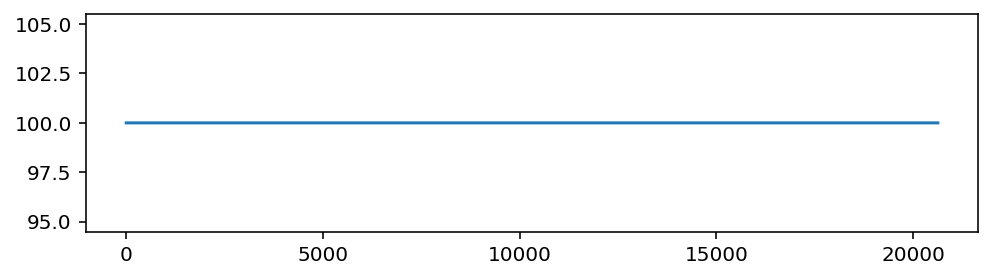

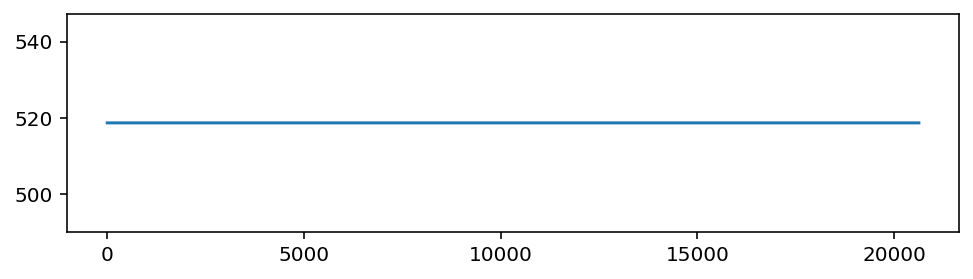

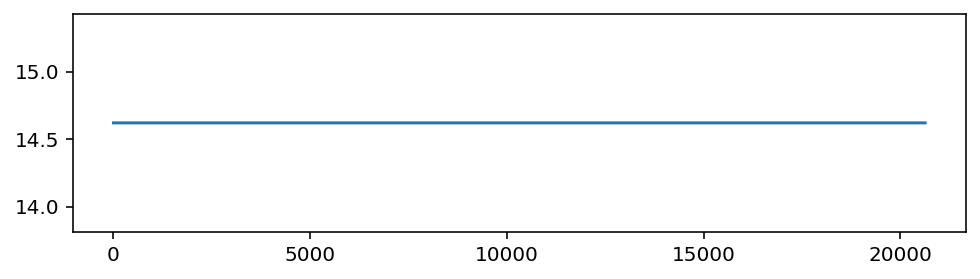

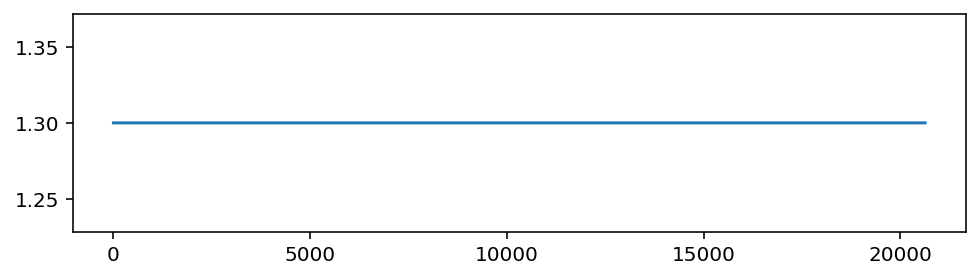

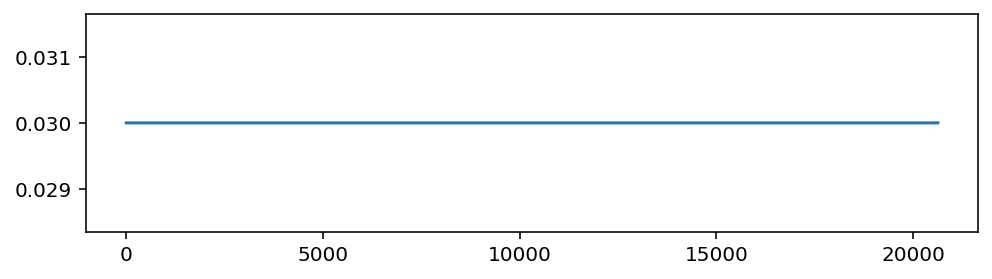

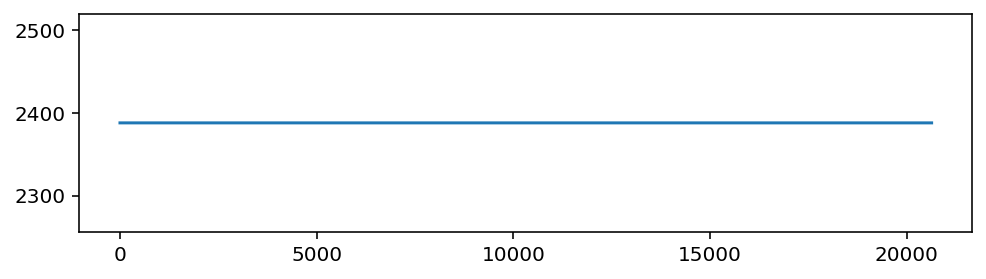

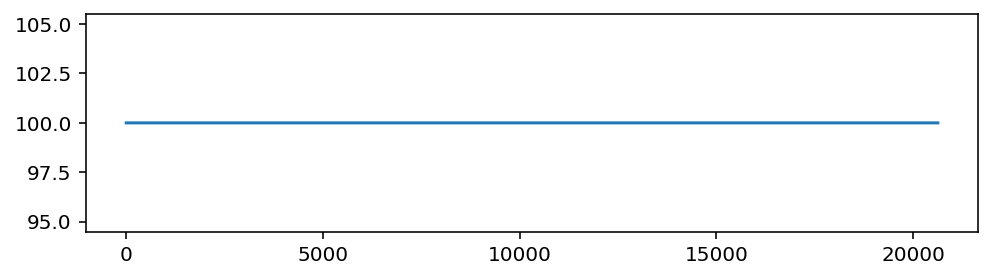

In [25]:
# 상관계수가 적은 센서 값을 보겠다
# 파이썬의 그림 그리는 패키지
import matplotlib.pyplot as plt

# 레티나 디스플레이를 사용하는 경우 고화질로 출력해준다
%config InlineBackend.figure_format = 'retina'

# 아래 센서값을 시각화 하기
discard = ['setting3','s1','s5','s10','s16','s18','s19']

# 아래 for문은, discard 리스트에서 하나씩 꺼내어 수행한다
for s in discard:
    plt.figure(figsize=(8, 2))
    df[s].plot()
    plt.show()

- 의미 없는 컬럼(특성)은 사용하지 않는다 (삭제한다)

In [26]:
# df 에서 discard 리스트에 있는 "컬럼"들을 삭제한다 (axis=1)

df = df.drop(discard, axis=1)
df[:3]

,id,cycle,setting1,setting2,s2,s3,s4,s6,s7,s8,...,s11,s12,s13,s14,s15,s17,s20,s21,RUL,label
0,1,1,-0.0007,-0.0004,641.82,1589.70,1400.60,21.61,554.36,2388.06,...,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190,191,0
1,1,2,0.0019,-0.0003,642.15,1591.82,1403.14,21.61,553.75,2388.04,...,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236,190,0
2,1,3,-0.0043,0.0003,642.35,1587.99,1404.20,21.61,554.26,2388.08,...,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442,189,0


In [27]:
# 분석에 사용한 특성 선택
# 모든 특성을 사용하는 경우
# features = ['setting1', 'setting2', 'setting3', 's1', 's2', 's3',
#             's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14',
#             's15', 's16', 's17', 's18', 's19', 's20', 's21']

# 일부 센서 데이터만 사용하는 경우 - discard 내용을 제외한 것
features = ['setting1','setting2','s2','s3','s4','s6','s7','s8','s9','s11','s12','s13','s14','s15','s17','s20','s21']


In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])
df[:3]

,id,cycle,setting1,setting2,s2,s3,s4,s6,s7,s8,...,s11,s12,s13,s14,s15,s17,s20,s21,RUL,label
0,1,1,-0.315980,-1.372953,-1.721725,-0.134255,-0.925936,0.141683,1.121141,-0.516338,...,-0.266467,0.334262,-1.058890,-0.269071,-0.603816,-0.781710,1.348493,1.194427,191,0
1,1,2,0.872722,-1.031720,-1.061780,0.211528,-0.643726,0.141683,0.431930,-0.798093,...,-0.191583,1.174899,-0.363646,-0.642845,-0.275852,-0.781710,1.016528,1.236922,190,0
2,1,3,-1.961874,1.015677,-0.661813,-0.413166,-0.525953,0.141683,1.008155,-0.234584,...,-1.015303,1.364721,-0.919841,-0.551629,-0.649144,-2.073094,0.739891,0.503423,189,0


## 테스트 데이터 전처리
- 훈련 데이터에 대한 전처리와 동일한 전처리를 테스트 데이터에 대해서도 수행해야 한다

In [29]:
# 테스트 데이터 다운로드

test_df = pd.read_csv('http://azuremlsamples.azureml.net/templatedata/PM_test.txt', sep=" ", header=None)
test_df.drop(test_df.columns[[26, 27]], axis=1, inplace=True)
test_df.columns = ['id', 'cycle', 'setting1', 'setting2', 'setting3', 's1', 's2', 's3',
                     's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14',
                     's15', 's16', 's17', 's18', 's19', 's20', 's21']

In [30]:
test_df

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,0.0049,0.0000,100.0,518.67,643.24,1599.45,1415.79,14.62,...,520.69,2388.00,8213.28,8.4715,0.03,394,2388,100.0,38.65,23.1974
13092,100,195,-0.0011,-0.0001,100.0,518.67,643.22,1595.69,1422.05,14.62,...,521.05,2388.09,8210.85,8.4512,0.03,395,2388,100.0,38.57,23.2771
13093,100,196,-0.0006,-0.0003,100.0,518.67,643.44,1593.15,1406.82,14.62,...,521.18,2388.04,8217.24,8.4569,0.03,395,2388,100.0,38.62,23.2051
13094,100,197,-0.0038,0.0001,100.0,518.67,643.26,1594.99,1419.36,14.62,...,521.33,2388.08,8220.48,8.4711,0.03,395,2388,100.0,38.66,23.2699


In [31]:
# discard 컬럼 삭제

test_df = test_df.drop(discard, axis=1)
test_df[:3]

,id,cycle,setting1,setting2,s2,s3,s4,s6,s7,s8,s9,s11,s12,s13,s14,s15,s17,s20,s21
0,1,1,0.0023,0.0003,643.02,1585.29,1398.21,21.61,553.90,2388.04,9050.17,47.2,521.72,2388.03,8125.55,8.4052,392,38.86,23.3735
1,1,2,-0.0027,-0.0003,641.71,1588.45,1395.42,21.61,554.85,2388.01,9054.42,47.5,522.16,2388.06,8139.62,8.3803,393,39.02,23.3916
2,1,3,0.0003,0.0001,642.46,1586.94,1401.34,21.61,554.11,2388.05,9056.96,47.5,521.97,2388.03,8130.10,8.4441,393,39.08,23.4166


- 정답 데이터를 테스트 데이터에 추가하기 위해서 truth 정보를 이용한다


In [32]:
# 정답 (테스트데이터의 잔여 수명) 데이터

truth_df = pd.read_csv('http://azuremlsamples.azureml.net/templatedata/PM_truth.txt', sep=" ", header=None)
truth_df.drop(truth_df.columns[[1]], axis=1, inplace=True)

In [33]:
truth_df

,0
0,112
1,98
2,69
3,82
4,91
...,...
95,137
96,82
97,59
98,117


In [34]:
# 테스트 데이터에 정답 잔여 수명 컬럼을 추가한다
rul = pd.DataFrame(test_df.groupby('id')['cycle'].max()).reset_index()
rul.columns = ['id', 'max']
truth_df.columns = ['more']
truth_df['id'] = truth_df.index + 1
truth_df['max'] = rul['max'] + truth_df['more']
truth_df.drop('more', axis=1, inplace=True)

# 각 행별로 잔여수명을 계산한다
test_df = test_df.merge(truth_df, on=['id'], how='left')
test_df['RUL'] = test_df['max'] - test_df['cycle']
test_df.drop('max', axis=1, inplace=True)
test_df.head()

# 분류를 위한 레이블 추가
test_df['label'] = np.where(test_df['RUL'] <= w, 1, 0 )
test_df.head()

,id,cycle,setting1,setting2,s2,s3,s4,s6,s7,s8,...,s11,s12,s13,s14,s15,s17,s20,s21,RUL,label
0,1,1,0.0023,0.0003,643.02,1585.29,1398.21,21.61,553.90,2388.04,...,47.20,521.72,2388.03,8125.55,8.4052,392,38.86,23.3735,142,0
1,1,2,-0.0027,-0.0003,641.71,1588.45,1395.42,21.61,554.85,2388.01,...,47.50,522.16,2388.06,8139.62,8.3803,393,39.02,23.3916,141,0
2,1,3,0.0003,0.0001,642.46,1586.94,1401.34,21.61,554.11,2388.05,...,47.50,521.97,2388.03,8130.10,8.4441,393,39.08,23.4166,140,0
3,1,4,0.0042,0.0000,642.44,1584.12,1406.42,21.61,554.07,2388.03,...,47.28,521.38,2388.05,8132.90,8.3917,391,39.00,23.3737,139,0
4,1,5,0.0014,0.0000,642.51,1587.19,1401.92,21.61,554.16,2388.01,...,47.31,522.15,2388.03,8129.54,8.4031,390,38.99,23.4130,138,0


### 스케일링 (주의)
- 훈련 데이터에 대해 수행한 스케일링과 동일한 조건을 테스트 데이터에 대해서도 적용해야 한다 (평균, 표준편차, 최소, 최대값 등)
- scaler.transform()을 사용해야 한다

In [35]:
test_df[features] = scaler.transform(test_df[features])
test_df[:3]

,id,cycle,setting1,setting2,s2,s3,s4,s6,s7,s8,...,s11,s12,s13,s14,s15,s17,s20,s21,RUL,label
0,1,1,1.055599,1.015677,0.678077,-0.853550,-1.191480,0.141683,0.601408,-0.798093,...,-1.277396,0.415614,-0.919841,-0.954235,-0.985107,-0.781710,0.241943,0.774097,142,0
1,1,2,-1.230366,-1.031720,-1.941707,-0.338137,-1.501467,0.141683,1.674769,-1.220725,...,-0.154141,1.012195,-0.502695,-0.216648,-1.649034,-0.136018,1.127183,0.941305,141,0
2,1,3,0.141213,0.333211,-0.441831,-0.584426,-0.843717,0.141683,0.838677,-0.657216,...,-0.154141,0.754581,-0.919841,-0.715712,0.052112,-0.136018,1.459148,1.172256,140,0



# 탐색적 분석
### 시각화

- 여러 특성의 시계열 변화를 시각화해본다
- 특정 특성값에 대해서 임의의 엔진 데이터 보기

In [36]:
# cycle과 s12 컬럼만 보기

df2 = df[['cycle', 's12']]
df2[:3]

,cycle,s12
0,1,0.334262
1,2,1.174899
2,3,1.364721


In [37]:
import matplotlib.pyplot as plt

def plot_time_series(df, s, engines):
    for e in engines:
        plt.figure(figsize=(8, 2))
        df2 = df[['cycle', s]][df.id == e]
        plt.plot(df2['cycle'],df2[s])
        plt.show()

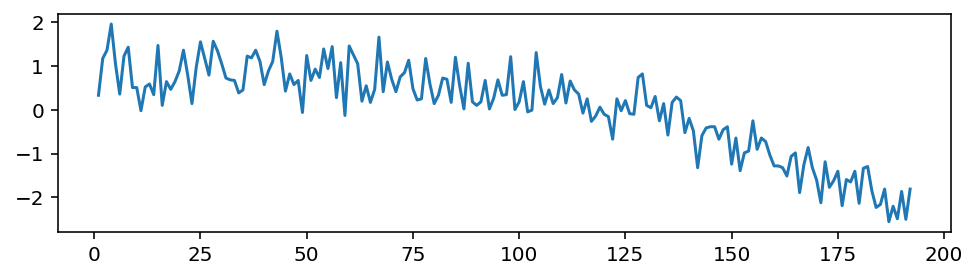

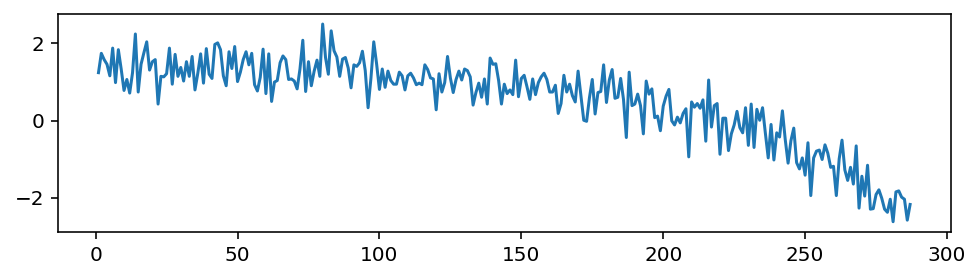

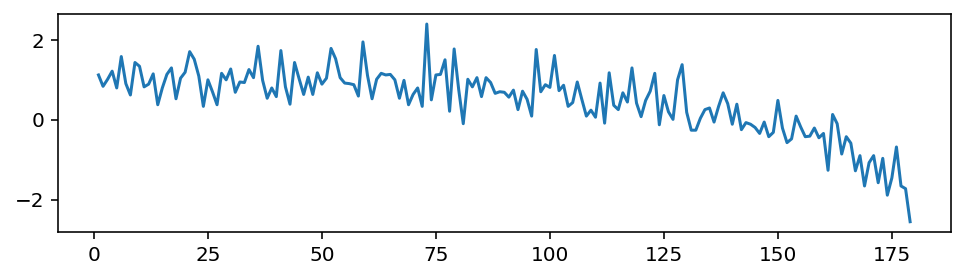

In [38]:
# s12 센서 특성에 대해서 임의로 엔진 1, 2, 3의 값을 시각화

plot_time_series(df, 's12',[1,2,3])

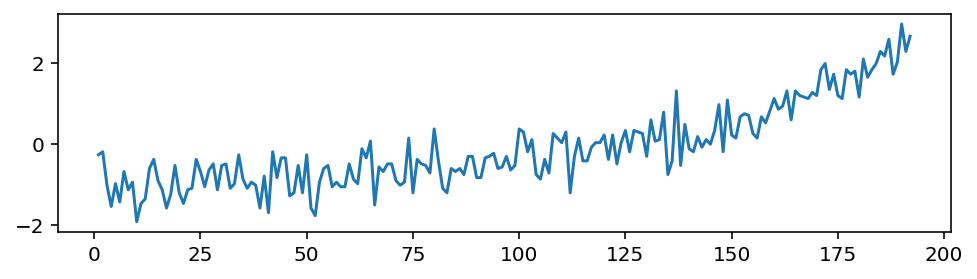

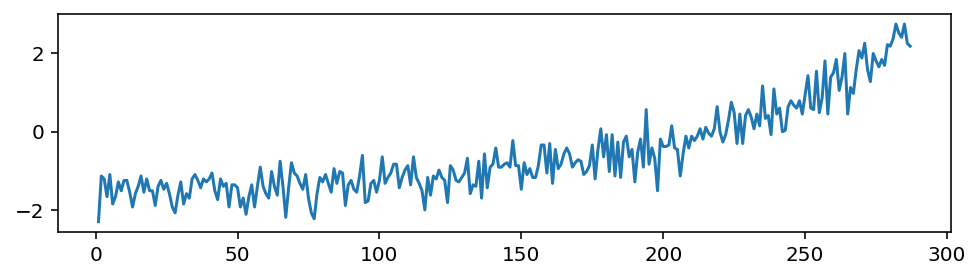

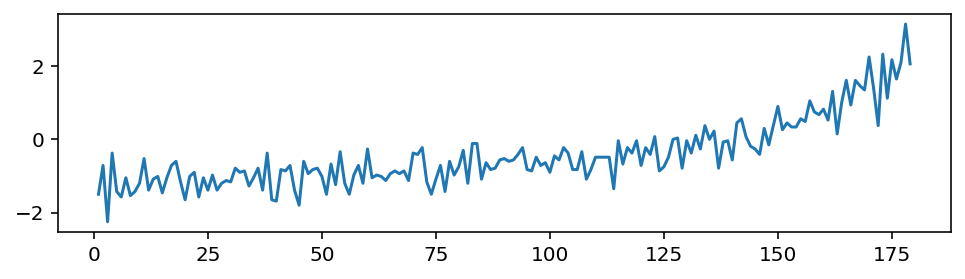

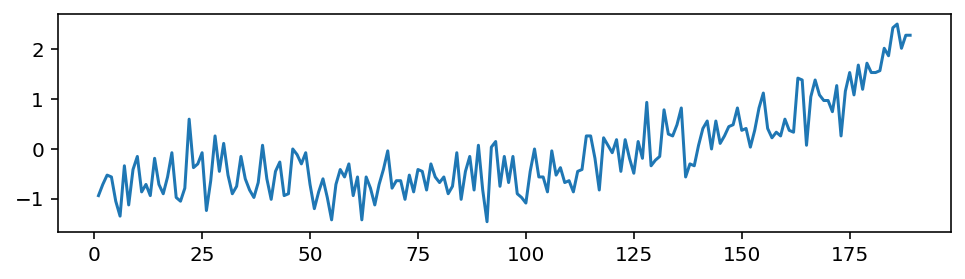

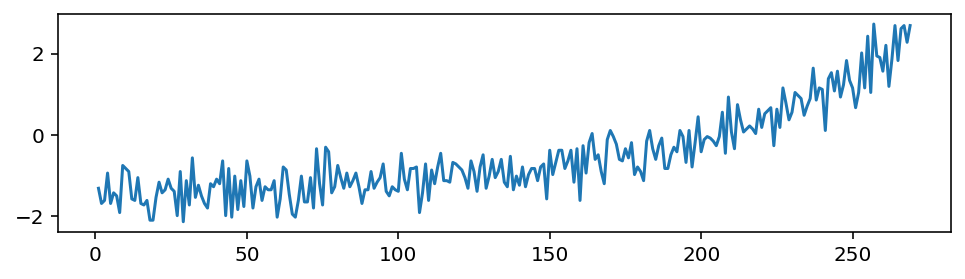

In [39]:
# s11 센서 특성에 대해서 엔진 1, 2, 3, 4, 5의 값을 시각화

plot_time_series(df, 's11',[1,2,3,4,5])

# 머신러닝 모델 구현 절차

- (1) 훈련 및 테스트 데이터 준비
- (2) 머신러닝에서 사용할 모델 선택
- (3) 훈련 데이터를 사용하여 모델 학습 (최적의 파라미터를 구한다)
- (4) 테스트 데이터를 사용하여 모델의 성능 평가

# 회귀 모델
## 훈련 및 테스트 데이터 준비

In [40]:
# 훈련 데이터

X_train = df[features]
X_train

,setting1,setting2,s2,s3,s4,s6,s7,s8,s9,s11,s12,s13,s14,s15,s17,s20,s21
0,-0.315980,-1.372953,-1.721725,-0.134255,-0.925936,0.141683,1.121141,-0.516338,-0.862813,-0.266467,0.334262,-1.058890,-0.269071,-0.603816,-0.781710,1.348493,1.194427
1,0.872722,-1.031720,-1.061780,0.211528,-0.643726,0.141683,0.431930,-0.798093,-0.958818,-0.191583,1.174899,-0.363646,-0.642845,-0.275852,-0.781710,1.016528,1.236922
2,-1.961874,1.015677,-0.661813,-0.413166,-0.525953,0.141683,1.008155,-0.234584,-0.557139,-1.015303,1.364721,-0.919841,-0.551629,-0.649144,-2.073094,0.739891,0.503423
3,0.324090,-0.008022,-0.661813,-1.261314,-0.784831,0.141683,1.222827,0.188048,-0.713826,-1.539489,1.961302,-0.224597,-0.520176,-1.971665,-0.781710,0.352598,0.777792
4,-0.864611,-0.690488,-0.621816,-1.251528,-0.301518,0.141683,0.714393,-0.516338,-0.457059,-0.977861,1.052871,-0.780793,-0.521748,-0.339845,-0.136018,0.463253,1.059552
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,-0.178822,-1.031720,1.618000,1.216258,2.188375,0.141683,-2.189329,1.315066,0.012547,1.980044,-2.607969,2.278282,-0.322542,1.425294,2.446751,-1.805173,-2.921113
20627,-0.727453,-1.714186,1.717992,2.279706,2.738351,0.141683,-2.833345,1.878576,-0.006020,1.867718,-2.350355,1.722087,-0.380207,1.913240,1.155367,-2.856395,-1.203764
20628,0.186933,-0.008022,1.478011,1.946971,2.138377,0.141683,-2.742957,2.019453,0.029755,2.054927,-1.902919,2.000184,-0.141684,3.265092,3.092444,-2.081810,-3.292481
20629,-0.498857,1.015677,1.098043,2.403666,1.955051,0.141683,-3.036719,2.160330,0.383884,3.178182,-2.363913,1.861136,-0.233948,2.579834,1.155367,-2.911722,-2.085072


- 회귀 분석을 하기 위해서 y 값으로 RUL을 사용한다

In [41]:
y_train = df.RUL
y_train

0        191
1        190
2        189
3        188
4        187
        ... 
20626      4
20627      3
20628      2
20629      1
20630      0
Name: RUL, Length: 20631, dtype: int64

In [42]:
# 테스트 데이터
X_test = test_df[features]
y_test = test_df['RUL']

## 선형 모델

In [43]:
# 모델 선택, 학습, 예측

from sklearn.linear_model import LinearRegression
lin = LinearRegression()
lin.fit(X_train, y_train)
y_pred = lin.predict(X_test)

### 회귀 모델 성능 평가
- 회귀 모델의 성능을 평가하는 척도로 기본적으로 R-Squared를 사용하며 MAE, RMSE 등을 참고로 본다
 - MAE: mean absolute error  
 - MSE: mean squared error    
 - RMSE: root MSE  

$MAE = $$1\over{N}$$ \sum |y_{i} - \hat{y}|$

$MSE = $$1\over{N}$$ \sum (y_{i} - \hat{y})^{2}$

$RMSE = \sqrt{MSE}$

$R^{2} = 1$-$\sum(y_{i}-\hat{y})^{2}\over{\sum(y_{i}-\bar{y})^{2}}$ $= 1$-$MSE\over{Variance}$  
 >  $y$ :  실제값, $\hat{y}$ :  예측치, $\bar{y}$ :  평균치

-  R-Squared
 - 회귀 성능의 기본적인 평가 지표
 - MSE를 분산으로 정규화한 값을 사용한다
 - R-sqaured 값은 1에 가까울수록 완벽한 예측을 수행한 것이고, 0 근처이면 오차 평균치가 표준편차 정도인 경우이다

In [44]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

def show_regression_result(y_test, y_pred, N=100):
    plt.rc('figure', figsize=(6,4))
    error = y_pred - y_test
    print("MAE=", np.abs(error).mean())
    print("rmse=", np.sqrt((error**2).mean()))
    print("max error=", max(abs(error)))
    print("R2=",r2_score(y_test, y_pred))

    if N > 0:
      plt.plot(y_test[:N], 'r.-', label='y_test')
      plt.plot(y_pred[:N], 'b.-', label='y_pred')
      plt.legend()
      plt.show()

MAE= 37.173906608879264
rmse= 48.39948399086451
max error= 219.46867479433797
R2= 0.32655301945956705


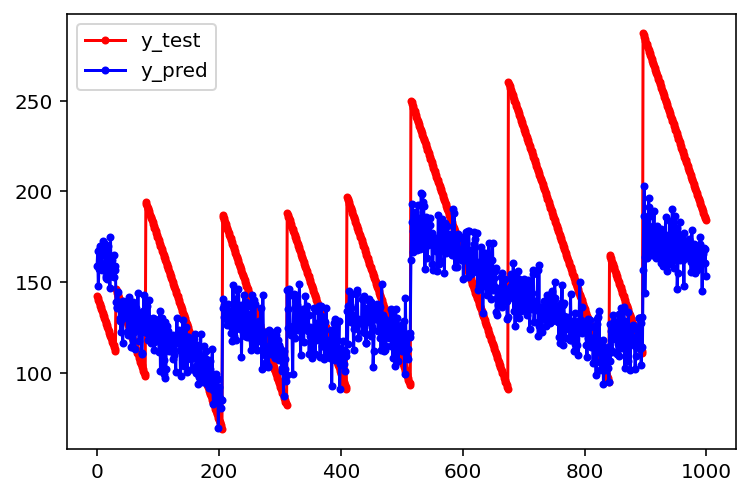

In [45]:
# 선형 모델 성능 평가
show_regression_result(y_test, y_pred, 1000)

In [46]:
# 선형 회귀 모델의 가중치(파라미터) 보기

lin.coef_

array([ 0.11185834,  0.45283509, -3.40902447, -2.70372301, -6.8838113 ,
       -0.7092495 ,  6.09098456, -0.93947937, -7.71864354, -9.93879351,
        7.83548153, -0.85322635, -5.22307351, -4.47833844, -2.86230807,
        3.58978195,  4.44713633])

In [47]:
# 가중치를 그려 보는 함수 정의

def plot_features_weights(features, weights):

    W = pd.DataFrame({'Weights':weights}, index=features)
    W = W.sort_values(by='Weights', ascending=True)
    W.plot(kind='barh', figsize=(8, 6))

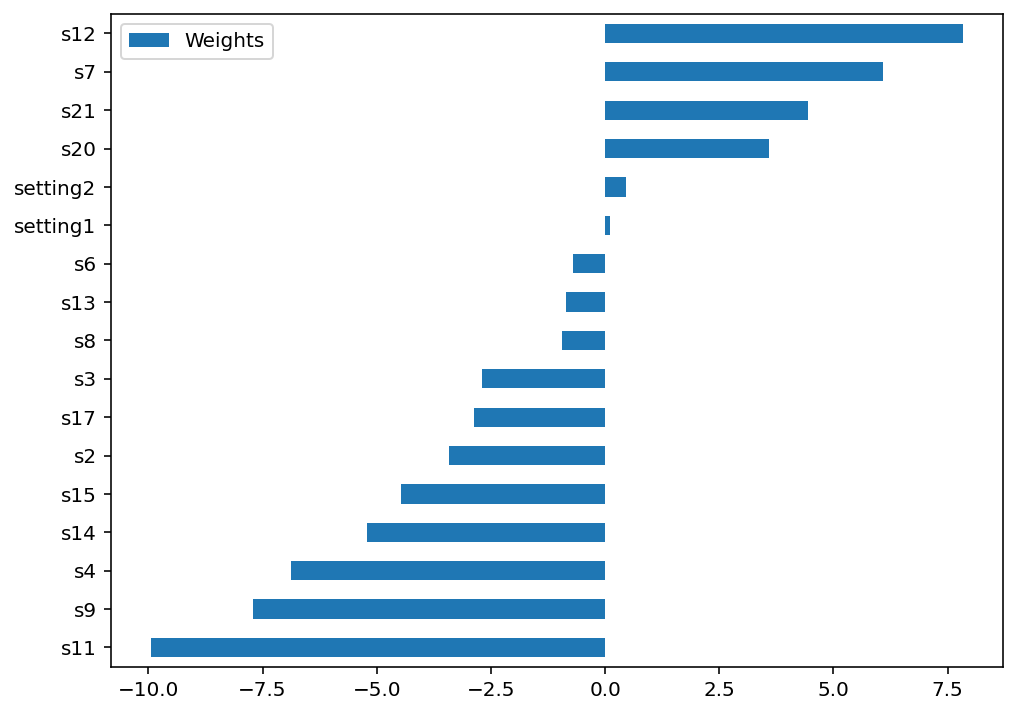

In [48]:
# 선형 모델 가중치 보기
plot_features_weights(X_train.columns, lin.coef_)

## 트리 모델

In [49]:
## 결정 트리를 이용한 이진 분류
# 트리의 깊이를 작게 선택하면 과소적합(under fitting)이 발생한다
# 트리의 깊이를 깊게 선택하면 과대적합(over fitting)이 발생한다

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

for depth in range(1,20):
    dtr = DecisionTreeRegressor(max_depth=depth)
    dtr.fit(X_train, y_train)
    print(depth, dtr.score(X_test, y_test).round(4))

1 0.0608
2 0.1893
3 0.2475
4 0.2829
5 0.318
6 0.3355
7 0.335
8 0.332
9 0.3093
10 0.2697
11 0.2239
12 0.1616
13 0.095
14 0.0269
15 -0.0489
16 -0.0997
17 -0.1458
18 -0.2046
19 -0.2307


In [50]:
# 최적의 깊이를 갖는 트리 모델

dtr = DecisionTreeRegressor(max_depth=6)
dtr.fit(X_train, y_train)
y_pred = dtr.predict(X_test)

MAE= 36.44470156775974
rmse= 48.07527760493374
max error= 220.90384615384616
R2= 0.33554503867166596


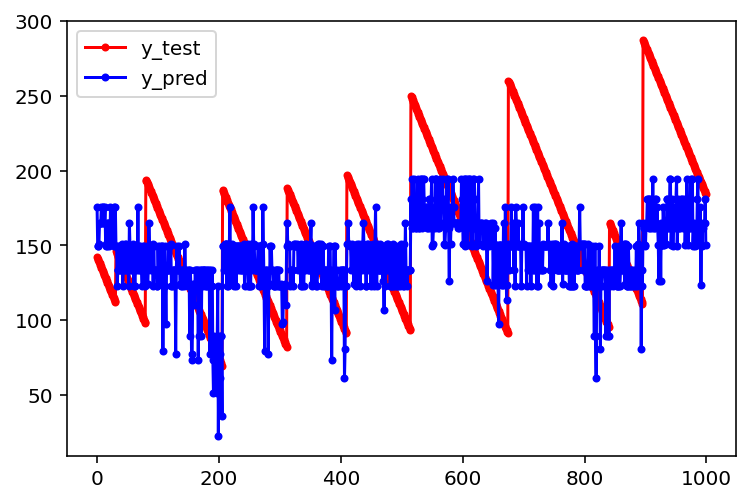

In [51]:
# 트리 모델 성능 평가
show_regression_result(y_test, y_pred, 1000)

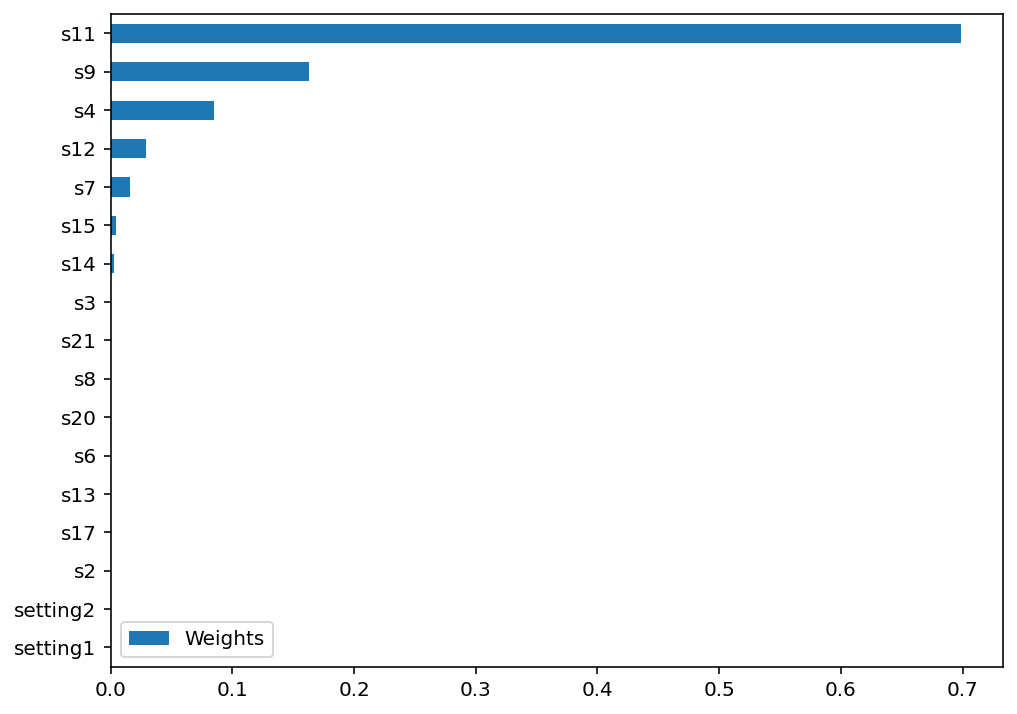

In [52]:
# 트리 모델 특성 중요도 보기
# 특성 중요도: 트리를 나눌때 순도를 높이는데(잘 분류하는데) 많이 기여한 정도를 알려준다

plot_features_weights(X_train.columns, dtr.feature_importances_)

## 랜덤 포레스트 모델

- 결정 트리 모델의 성능을 개선한 앙상블 모델

MAE= 35.06369883934011
rmse= 46.45676191844911
max error= 210.99
R2= 0.3795313848558648


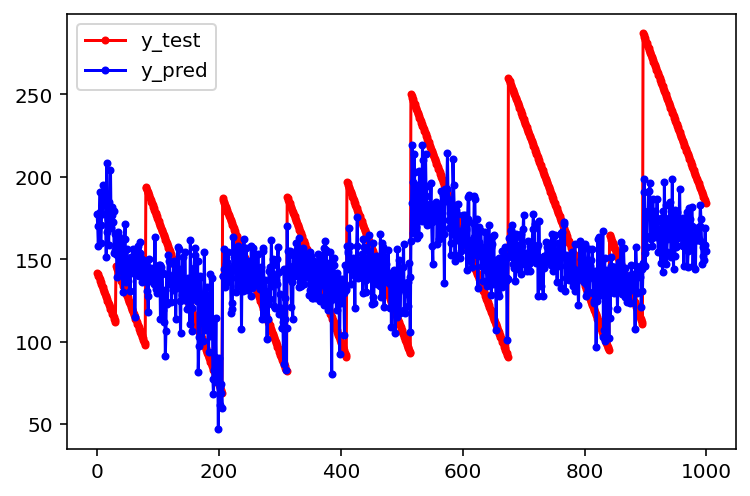

In [53]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)
show_regression_result(y_test, y_pred, 1000)

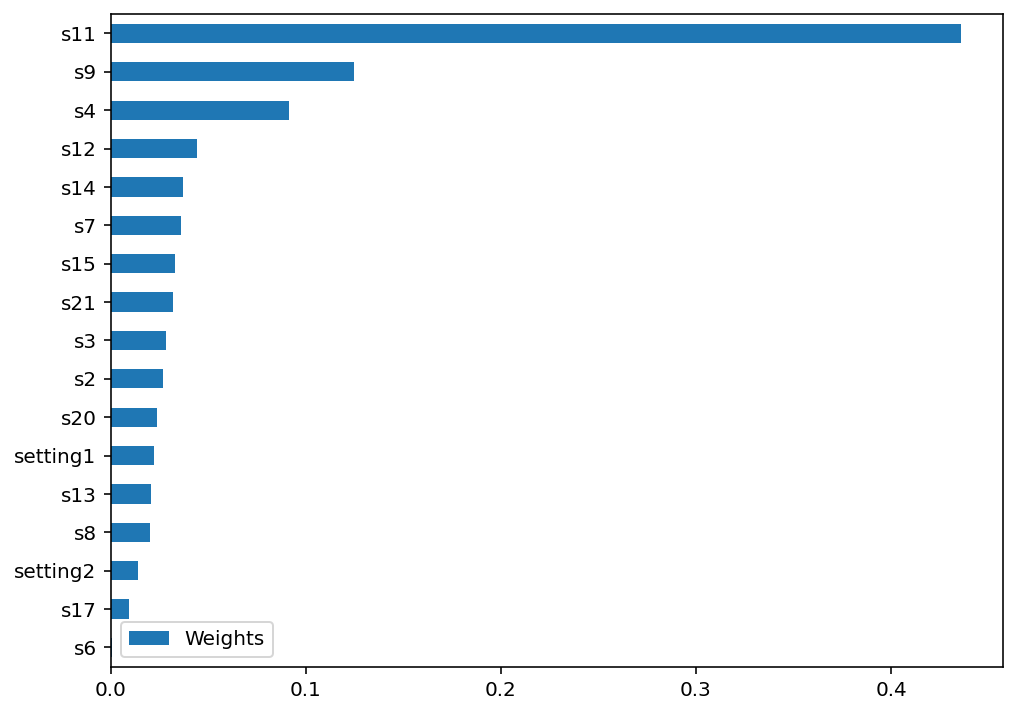

In [54]:
# 랜덤 포레스트 모델의 특성 중요도 보기
plot_features_weights(X_train.columns, rfr.feature_importances_)

## 부스팅 모델

- 결정 트리를 순차적으로 적용한 앙상블 모델
- 랜덤 포레스트는 병렬적으로 적용한 것임

MAE= 34.57235201392287
rmse= 46.09395895217464
max error= 214.27562597739532
R2= 0.38918461326031417


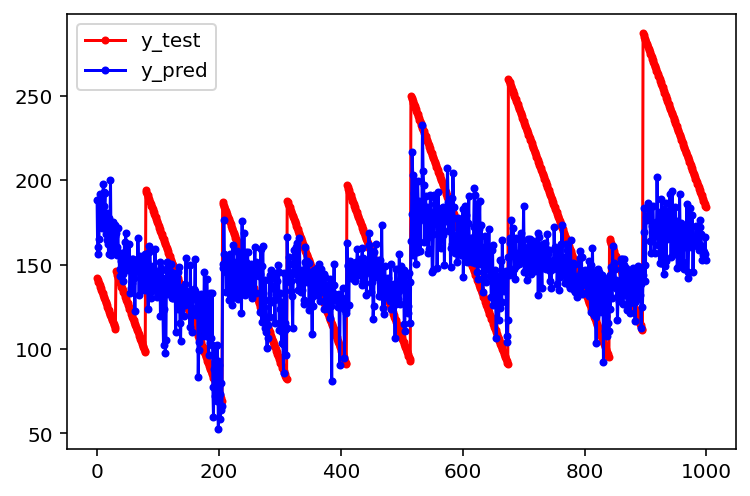

In [55]:
from lightgbm import LGBMClassifier, LGBMRegressor

lgbm_r = LGBMRegressor()
lgbm_r.fit(X_train, y_train)
y_pred = lgbm_r.predict(X_test)
show_regression_result(y_test, y_pred,1000)

# 분류 모델

- 특정 기간 내에 장애가 발생할지를 이진 분류로 예측하는 모델

- X는 그대로 사용하고 y 값을 분류용 label로 변경한다

In [56]:
y_train_c = df['label']
y_test_c = test_df['label']

In [57]:
from sklearn.metrics import confusion_matrix, classification_report

def show_clf_result(y_test, y_pred):
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

## 선형 모델

In [58]:
dtc = DecisionTreeClassifier(max_depth=5)
dtc.fit(X_train, y_train_c)
y_pred = dtc.predict(X_test)
show_clf_result(y_test_c, y_pred)

[[12705    59]
 [  152   180]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     12764
           1       0.75      0.54      0.63       332

    accuracy                           0.98     13096
   macro avg       0.87      0.77      0.81     13096
weighted avg       0.98      0.98      0.98     13096



## 트리 모델

In [59]:
## 결정 트리를 이용한 이진 분류
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

for depth in range(1,20):
    dtc = DecisionTreeClassifier(max_depth=depth)
    dtc.fit(X_train, y_train_c)
    print(depth, dtc.score(X_test, y_test_c).round(4))

1 0.9746
2 0.9818
3 0.9829
4 0.9828
5 0.9839
6 0.9836
7 0.983
8 0.9836
9 0.9833
10 0.9823
11 0.9811
12 0.9808
13 0.9807
14 0.9796
15 0.9782
16 0.9779
17 0.9769
18 0.9779
19 0.9772


In [60]:
dtc = DecisionTreeClassifier(max_depth=5)
dtc.fit(X_train, y_train_c)
y_pred = dtc.predict(X_test)
show_clf_result(y_test_c, y_pred)

[[12705    59]
 [  152   180]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     12764
           1       0.75      0.54      0.63       332

    accuracy                           0.98     13096
   macro avg       0.87      0.77      0.81     13096
weighted avg       0.98      0.98      0.98     13096



- support는 레이블 별 샘플수
- macro 평균은 성능평가 점수들을 단순히 산술평균을 구한 것
- weighted 평균은 샘플의 갯수를 고려하여 가중평균을 구한 것

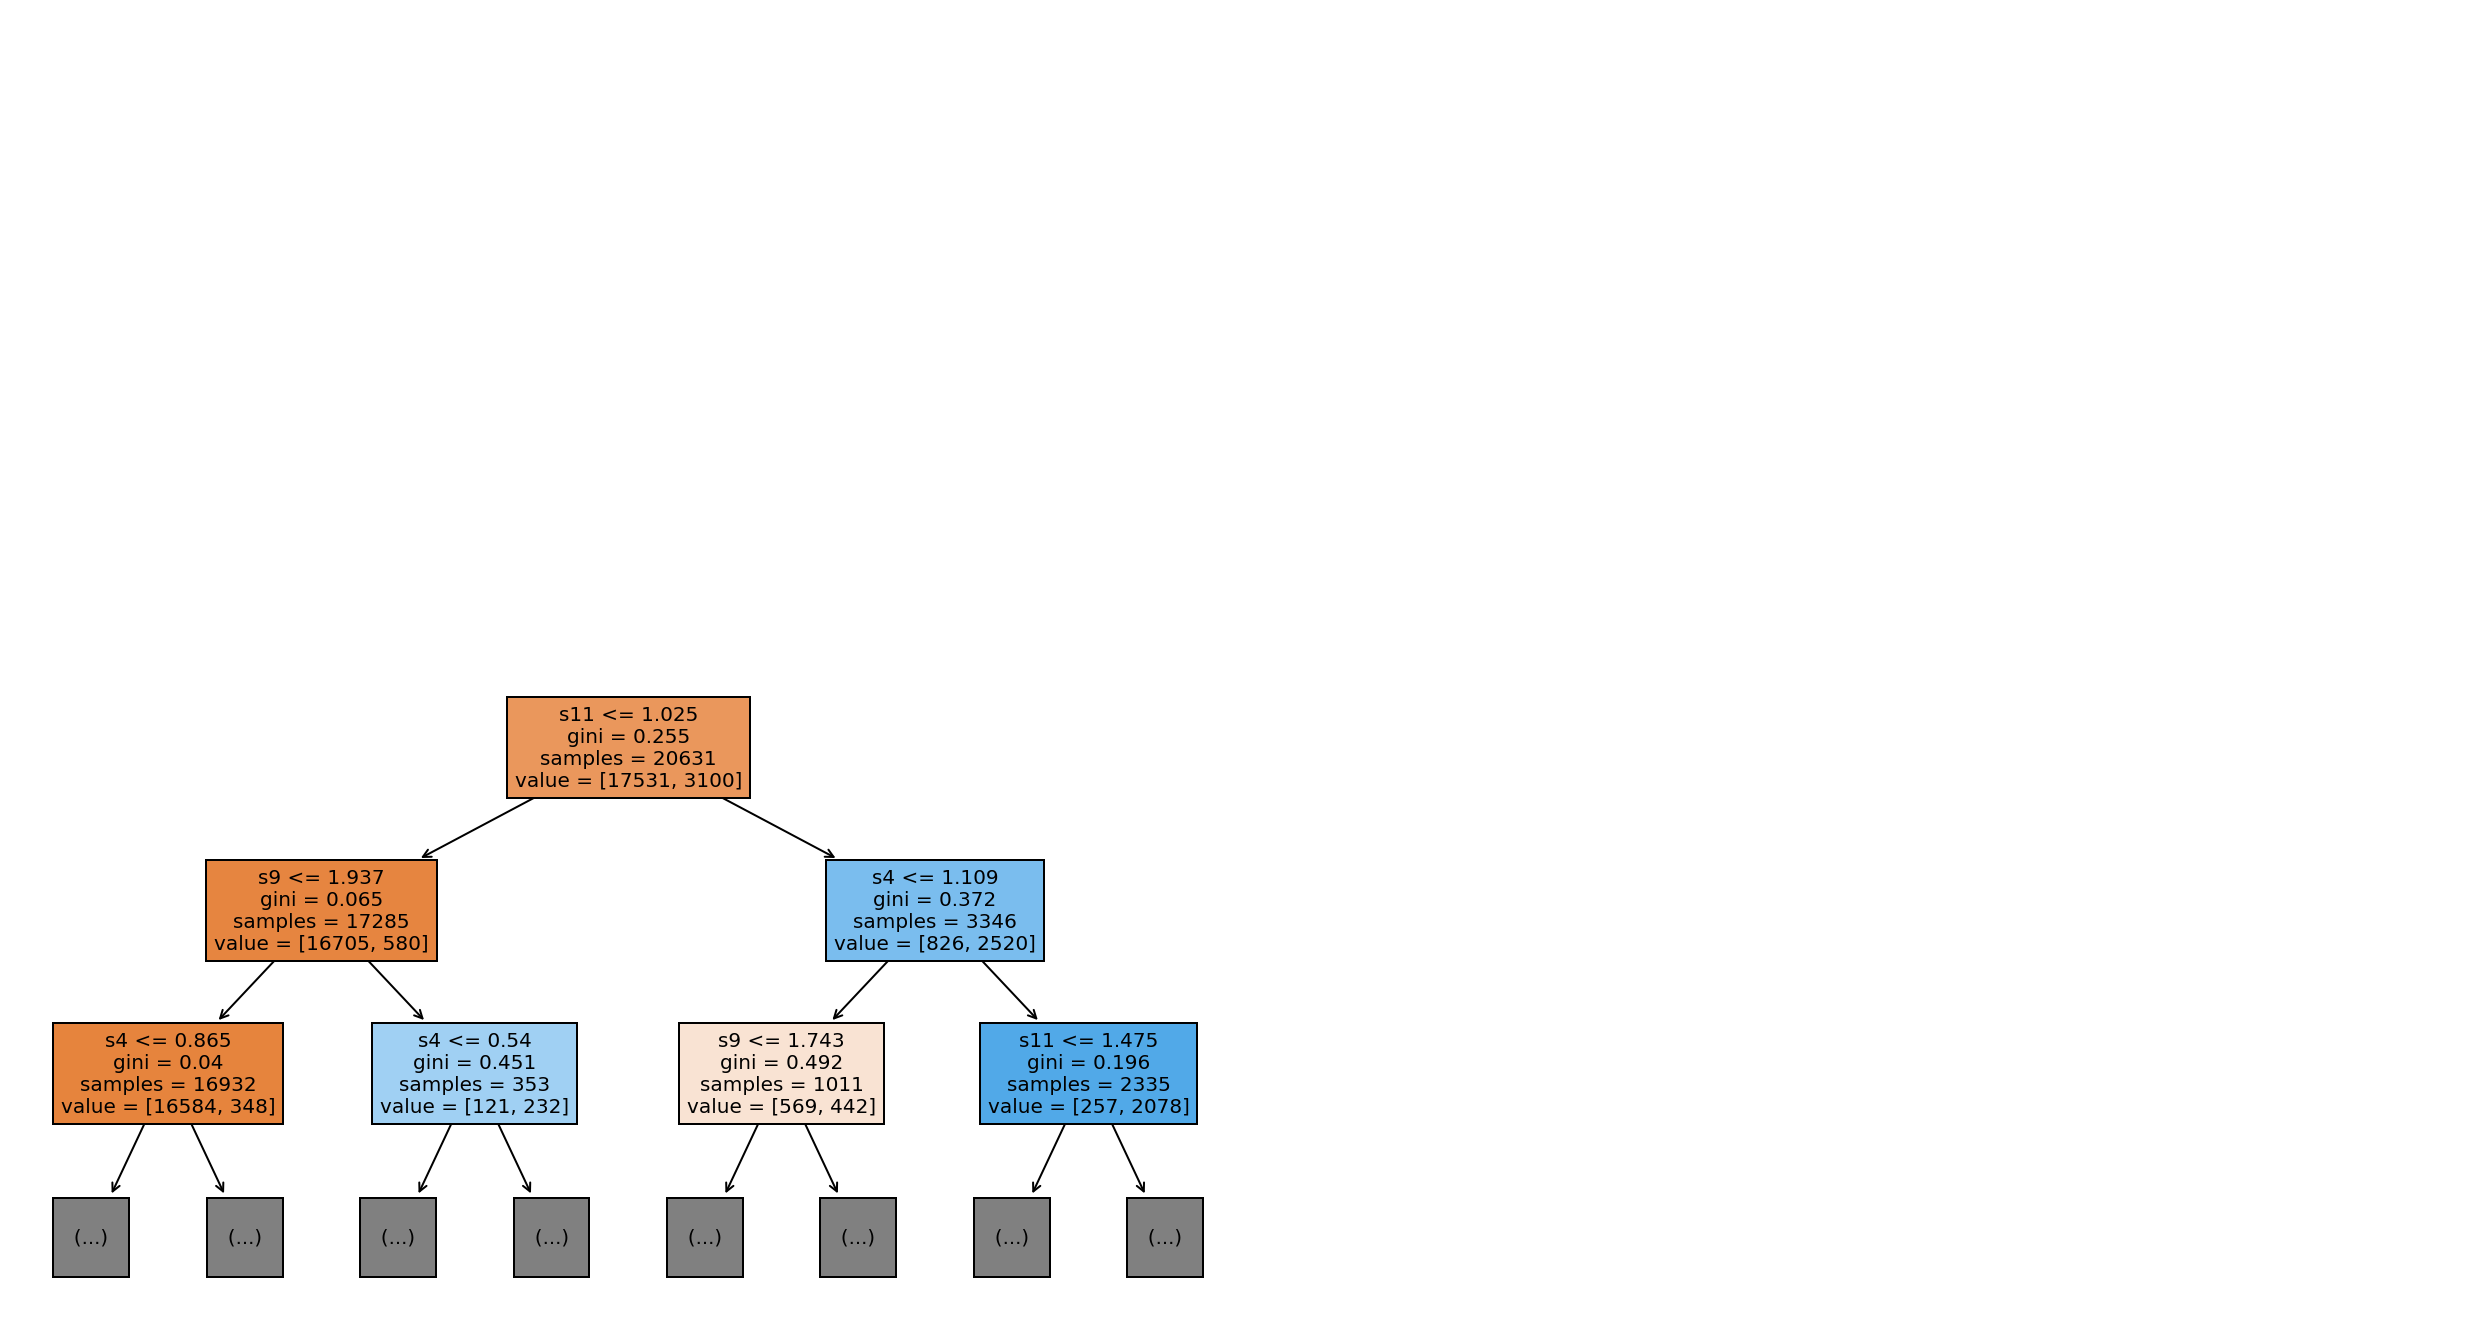

In [61]:
# 트리 그리기

from sklearn import tree

plt.figure(figsize=(22,12))

tree.plot_tree(dtc, fontsize=10,
              feature_names=list(X_train.columns),
              filled=True,
              impurity=True,
              max_depth=2)
plt.show()

In [62]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train_c)
y_pred = rfc.predict(X_test)

In [63]:
show_clf_result(y_test_c, y_pred)

[[12720    44]
 [  130   202]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     12764
           1       0.82      0.61      0.70       332

    accuracy                           0.99     13096
   macro avg       0.91      0.80      0.85     13096
weighted avg       0.99      0.99      0.99     13096



## 부스팅 모델

In [64]:
lgbm_c = LGBMClassifier()
lgbm_c.fit(X_train, y_train_c)
y_pred = lgbm_c.predict(X_test)
show_clf_result(y_test_c, y_pred)

[[12714    50]
 [  125   207]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     12764
           1       0.81      0.62      0.70       332

    accuracy                           0.99     13096
   macro avg       0.90      0.81      0.85     13096
weighted avg       0.99      0.99      0.99     13096



# 신경망 모델

- LSTM 사용
- LSTM 윈도우를 충분히 크게 잡으면 윈도우 내의 중요한 신호를 파악하여 사용할 수 있다
- LSTM 신경망은 (samples, time steps, features) 구조의 입력를 필요로 한다
- colab에서 실행해야 함

## 시퀀스를 n_steps 크기로 나누는 함수

- (주의) 아래 함수는 마지막 샘플은 포함하지 않는다
- 현재 데이터로 현재를 예측하는 것이 맞는지는 응용에 따라서 점검해야 한다

In [65]:
def split_seq(sequence, n_steps):
  x = []
  for i in range(len(sequence)- n_steps):
    x.append(sequence[i:i+ n_steps])
  return np.array(x)

In [66]:
# 예제
# 특성수가 3인 시계열 데이터를 스텝수가 4가 되도록 3차원 어레이로 만드는 함수

x = np.arange(30).reshape(-1,3)
print(x)
inp = split_seq(x,4)
print('LSTM 모델 입력용 데이터:',inp.shape)
inp

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]
 [12 13 14]
 [15 16 17]
 [18 19 20]
 [21 22 23]
 [24 25 26]
 [27 28 29]]
LSTM 모델 입력용 데이터: (6, 4, 3)


array([[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11]],

       [[ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11],
        [12, 13, 14]],

       [[ 6,  7,  8],
        [ 9, 10, 11],
        [12, 13, 14],
        [15, 16, 17]],

       [[ 9, 10, 11],
        [12, 13, 14],
        [15, 16, 17],
        [18, 19, 20]],

       [[12, 13, 14],
        [15, 16, 17],
        [18, 19, 20],
        [21, 22, 23]],

       [[15, 16, 17],
        [18, 19, 20],
        [21, 22, 23],
        [24, 25, 26]]])

## 입력 시퀀스 만들기

In [67]:
# 주의: 같은 id인 엔진의 데이터로만 학습데이터 스텝을 만들어야 한다
n_steps = 50
res = []
for id in df['id'].unique():
  res.append(split_seq(df[df['id']==id][features], n_steps))
seq_array = np.concatenate(res)
seq_array.shape

(15631, 50, 17)

In [68]:
# 각 동일한 엔진에 대한 데이터를 50개씩 사용해야 하므로 샘플수가 줄어들었다
# 50개 샘플이 두개의 엔진에 걸쳐 있는 데이터는 버림
df.shape

(20631, 21)

## 회귀 모델

In [69]:
# 회귀 레이블 얻기
res2 = []
label = ["RUL"]
for id in df['id'].unique():
  res2.append(df[df['id']==id][label][n_steps:len(df)])
label_array = np.concatenate(res2)
label_array.shape

(15631, 1)

In [ ]:
import keras
from keras import Sequential
from keras.layers import Dropout, LSTM, Dense, Activation

nb_features = seq_array.shape[2]
nb_out = label_array.shape[1]

model = Sequential()

model.add(LSTM(
         input_shape=(n_steps, nb_features), # 스텝 수, 특성 수
         units=100))                          # 셀의 수

model.add(Dense(1)) # 1
model.add(Activation("linear"))

In [ ]:
model.summary()

In [78]:
model.compile(loss='mean_squared_error', optimizer='rmsprop',metrics=['mse'])

history = model.fit(seq_array, label_array, epochs=100, batch_size=50, validation_split=0.1, verbose=2,
          callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=0, mode='min')])

print(history.history.keys())

Epoch 1/100
282/282 - 10s - loss: 6480.0249 - mse: 6480.0249 - val_loss: 7253.5088 - val_mse: 7253.5088 - 10s/epoch - 36ms/step
Epoch 2/100
282/282 - 1s - loss: 3739.4946 - mse: 3739.4946 - val_loss: 4539.1738 - val_mse: 4539.1738 - 1s/epoch - 5ms/step
Epoch 3/100
282/282 - 2s - loss: 2102.8262 - mse: 2102.8262 - val_loss: 2845.8472 - val_mse: 2845.8472 - 2s/epoch - 5ms/step
Epoch 4/100
282/282 - 2s - loss: 1220.7690 - mse: 1220.7690 - val_loss: 1749.1897 - val_mse: 1749.1897 - 2s/epoch - 6ms/step
Epoch 5/100
282/282 - 1s - loss: 824.7014 - mse: 824.7013 - val_loss: 1676.2052 - val_mse: 1676.2052 - 1s/epoch - 5ms/step
Epoch 6/100
282/282 - 1s - loss: 661.2087 - mse: 661.2086 - val_loss: 1221.4836 - val_mse: 1221.4836 - 1s/epoch - 5ms/step
Epoch 7/100
282/282 - 1s - loss: 581.0772 - mse: 581.0772 - val_loss: 1196.4945 - val_mse: 1196.4944 - 1s/epoch - 5ms/step
Epoch 8/100
282/282 - 1s - loss: 526.5940 - mse: 526.5940 - val_loss: 1529.7329 - val_mse: 1529.7329 - 1s/epoch - 5ms/step
Epoch

In [79]:
y_pred = model.predict(seq_array,verbose=1, batch_size=50)

313/313 [==============================] - 1s 3ms/step


MAE= 16.154896447101958
rmse= 25.76519310634963
max error= [161.84155273]
R2= 0.7966918449956034


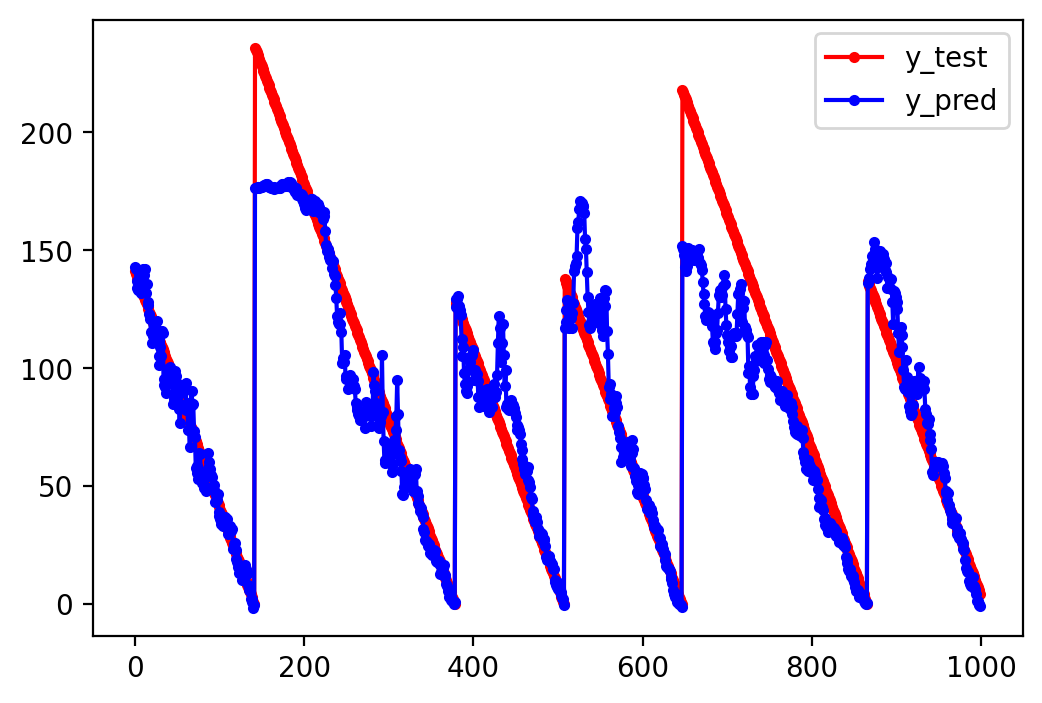

In [80]:
show_regression_result(label_array, y_pred,1000)

- 테스트 데이터의 각 엔진별 마지막 50 샘플을 입력으로 사용한다
- 마지막 샘플수가 50보다 작은 경우는 테스트할 수 없다

In [81]:
sequence_cols = features
sequence_length = 50
seq_array_test_last = [test_df[test_df['id']==id][sequence_cols].values[-sequence_length:]
                       for id in test_df['id'].unique() if len(test_df[test_df['id']==id]) >= sequence_length]

seq_array_test_last = np.asarray(seq_array_test_last).astype(np.float32)
seq_array_test_last.shape

(93, 50, 17)

In [82]:
# test_df의 마지막 샘플의 크기가 50 이상인지를 확인
y_mask = [len(test_df[test_df['id']==id]) >= sequence_length for id in test_df['id'].unique()]

In [83]:
len(y_mask), np.array(y_mask).sum()

(100, 93)

- 회귀 레이블 얻기

In [84]:
y_test = test_df.groupby('id')['RUL'].nth(-1)[y_mask].values
y_test

array([ 69,  82,  91,  93,  91,  95, 111,  96,  97, 124,  95,  83,  84,
        50,  28,  87,  16,  57, 113,  20, 119,  66,  97,  90, 115,   8,
        48, 106,   7,  11,  19,  21,  50,  28,  18,  10,  59, 109, 114,
        47, 135,  92,  21,  79, 114,  29,  26,  97, 137,  15, 103,  37,
       114, 100,  21,  54,  72,  28, 128,  14,  77,   8, 121,  94, 118,
        50, 131, 126, 113,  10,  34, 107,  63,  90,   8,   9, 137,  58,
        89, 116, 115, 136,  28,  38,  20,  85,  55, 128, 137,  82,  59,
       117,  20])

In [85]:
label_array_test_last = test_df.groupby('id')['RUL'].nth(-1)[y_mask].values
label_array_test_last = label_array_test_last.reshape(label_array_test_last.shape[0],1).astype(np.float32)
label_array_test_last.shape

(93, 1)

In [86]:
print(seq_array_test_last.shape)
print(label_array_test_last.shape)

(93, 50, 17)
(93, 1)


In [87]:
y_pred = model.predict(seq_array_test_last)

3/3 [==============================] - 0s 5ms/step


MAE= 17.453403858728308
rmse= 26.948699570919075
max error= 110.33656311035156
R2= 0.5685839334357745


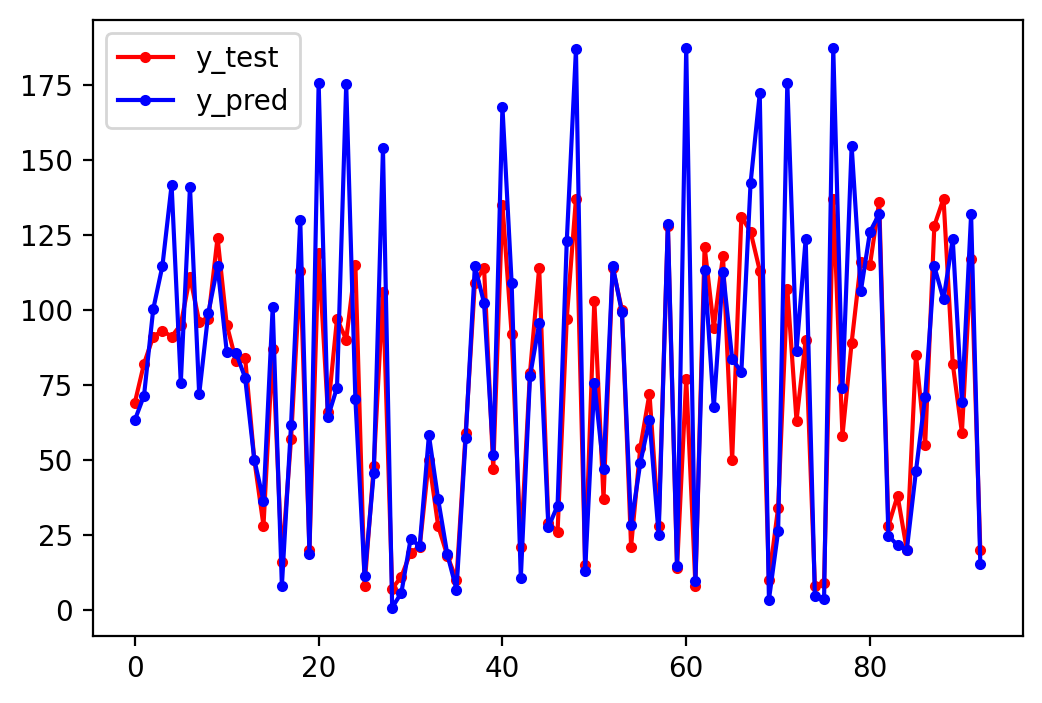

In [88]:
# 회귀 성능
show_regression_result(y_test, y_pred.ravel(),100)

## 이진 분류 모델

In [89]:
# 이진분류 레이블 얻기
res2 = []
label = ["label"]
for id in df['id'].unique():
  res2.append(df[df['id']==id][label][n_steps:len(df)])
label_array = np.concatenate(res2)
label_array.shape

(15631, 1)

- softmax 대신 sigmoid를 사용할 수 있다 (이진 분류시)
- loss='binary_crossentropy'로 지정해야 한다

In [90]:
nb_features = seq_array.shape[2]
nb_out = label_array.shape[1]

model = Sequential()

model.add(LSTM(
         input_shape=(n_steps, nb_features), # 스텝 수, 특성 수
         units=100))                          # 셀의 수

model.add(Dense(units=nb_out, activation='sigmoid'))

In [91]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 100)               47200     
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 47301 (184.77 KB)
Trainable params: 47301 (184.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [92]:
seq_array.shape, label_array.shape

((15631, 50, 17), (15631, 1))

In [93]:
%%time
# fit the network
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(seq_array, label_array, epochs=100, batch_size=200, validation_split=0.1, verbose=1,
          callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, verbose=0, mode='auto')])

Epoch 1/100
71/71 [==============================] - 4s 15ms/step - loss: 0.2003 - accuracy: 0.9074 - val_loss: 0.0726 - val_accuracy: 0.9706
Epoch 2/100
71/71 [==============================] - 1s 7ms/step - loss: 0.0728 - accuracy: 0.9697 - val_loss: 0.0721 - val_accuracy: 0.9693
Epoch 3/100
71/71 [==============================] - 1s 7ms/step - loss: 0.0615 - accuracy: 0.9741 - val_loss: 0.0606 - val_accuracy: 0.9706
Epoch 4/100
71/71 [==============================] - 0s 7ms/step - loss: 0.0554 - accuracy: 0.9756 - val_loss: 0.0759 - val_accuracy: 0.9674
Epoch 5/100
71/71 [==============================] - 1s 8ms/step - loss: 0.0504 - accuracy: 0.9785 - val_loss: 0.0545 - val_accuracy: 0.9744
Epoch 6/100
71/71 [==============================] - 0s 7ms/step - loss: 0.0450 - accuracy: 0.9809 - val_loss: 0.0742 - val_accuracy: 0.9751
Epoch 7/100
71/71 [==============================] - 0s 7ms/step - loss: 0.0458 - accuracy: 0.9802 - val_loss: 0.0842 - val_accuracy: 0.9591
Epoch 8/100


In [94]:
label_array_test_last = test_df.groupby('id')['label'].nth(-1)[y_mask].values
label_array_test_last = label_array_test_last.reshape(label_array_test_last.shape[0],1)
label_array_test_last.shape

(93, 1)

In [95]:
# 이진 분류 확률을 얻는다
y_pred_test = model.predict(seq_array_test_last)
show_clf_result(label_array_test_last, y_pred_test > 0.5)

3/3 [==============================] - 0s 5ms/step
[[66  2]
 [ 3 22]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.96        68
           1       0.92      0.88      0.90        25

    accuracy                           0.95        93
   macro avg       0.94      0.93      0.93        93
weighted avg       0.95      0.95      0.95        93

